In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


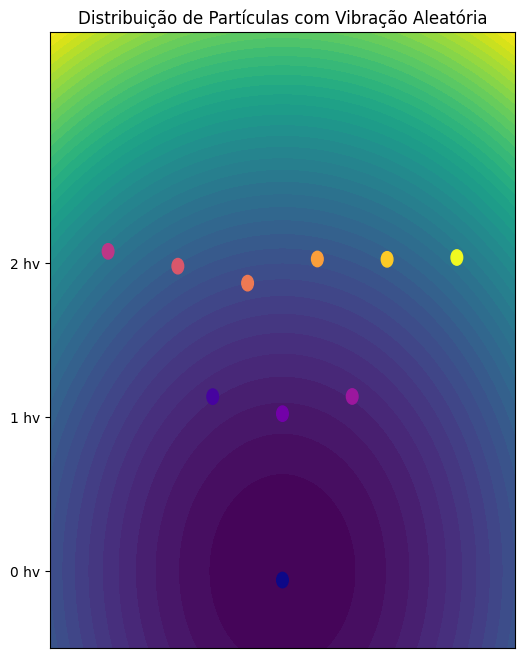

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Configuração do potencial oscilador harmônico
def potential(x, y):
    return 0.5 * (x**2 + y**2)

# Parâmetros do sistema
n_particles = 10  # Número total de partículas
energy_distribution = [1, 3, 6]  # Distribuição de partículas por nível de energia
energy_levels = np.arange(0, len(energy_distribution))  # Níveis de energia
colors = plt.cm.plasma(np.linspace(0, 1, n_particles))  # Cores para as partículas

# Configuração do grid e potencial
x = np.linspace(-2, 2, 400)
y = np.linspace(-0.5, len(energy_levels) + 0.5, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

# Configuração da figura
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, len(energy_levels) + 0.5)
ax.set_xticks([])
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{n} hv" for n in energy_levels])
ax.set_title("Distribuição de Partículas com Vibração Aleatória")

# Adicionar contorno do potencial ao fundo
ax.contourf(X, Y, Z, cmap='viridis', levels=50)

# Adicionar círculos concêntricos para representar as linhas de potencial
#for r in np.arange(0.5, len(energy_levels) + 0.5, 1):  # Raios que cobrem os níveis de energia
#    circle = plt.Circle((0, r), 0.5, color='white', fill=False, linestyle='--', alpha=0.5)
#    ax.add_patch(circle)

# Lista de objetos gráficos para as partículas
particles = [plt.Circle((0, 0), 0.05, color=colors[i]) for i in range(n_particles)]
for particle in particles:
    ax.add_patch(particle)

# Função para calcular a posição inicial das partículas
def calculate_positions(energy_distribution):
    positions = []
    current_particle = 0
    for level, count in enumerate(energy_distribution):
        for i in range(count):
            offset = (i - (count - 1) / 2) * 0.6  # Distribui as partículas ao longo do nível de energia
            positions.append((offset, level))
            current_particle += 1
    return positions

# Posições calculadas para as partículas
positions = calculate_positions(energy_distribution)

# Parâmetros aleatórios para vibração
amplitudes = np.random.uniform(0.05, 0.15, n_particles)  # Amplitude aleatória entre 0.05 e 0.15
frequencies = np.random.uniform(0.2, 0.7, n_particles)  # Frequência aleatória entre 0.2 e 0.7

# Função de atualização para a animação
def update(frame):
    for i in range(n_particles):
        particle = particles[i]
        x, y = positions[i]
        # Variação aleatória da vibração para cada partícula
        y_vibration = y + amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * frame / 100)
        particle.center = (x, y_vibration)  # Aplica a vibração no nível de energia
    return particles

# Criação da animação
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Salvando o GIF
writer = PillowWriter(fps=20)
ani.save("vibra_aleato_fermi_gas_background.gif", writer=writer)

plt.show()


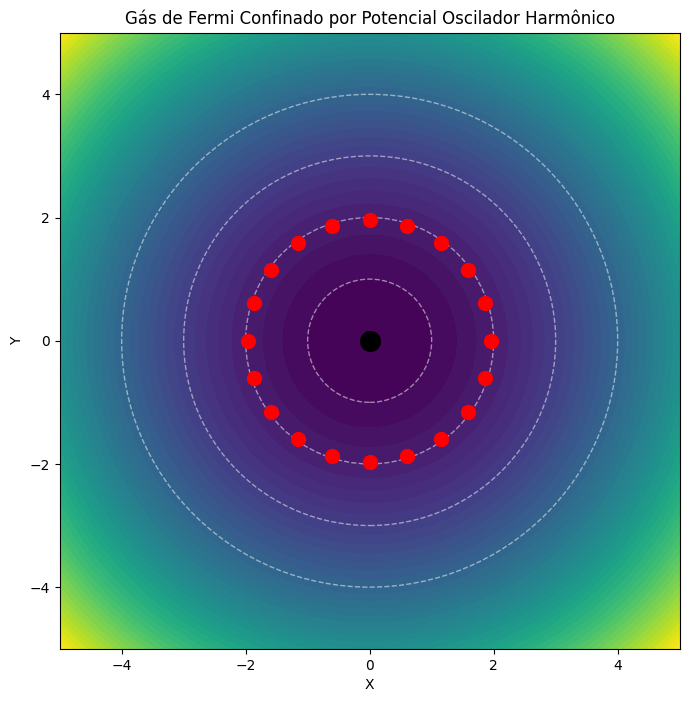

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

# Configuração do potencial oscilador harmônico
def potential(x, y):
    return 0.5 * (x**2 + y**2)

# Parâmetros
num_frames = 100
num_particles = 20
radius = 2  # Raio de confinamento das partículas (reduzido)

# Configuração do grid e potencial
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

# Função de atualização da animação
def update(frame):
    ax.clear()

    # Adicionar contorno do potencial
    ax.contourf(X, Y, Z, cmap='viridis', levels=50)

    # Adicionar círculos concêntricos para representar as linhas de potencial
    for r in np.arange(1, 5, 1):  # Raios de 1 a 4
        circle = plt.Circle((0, 0), r, color='white', fill=False, linestyle='--', alpha=0.5)
        ax.add_patch(circle)

    # Calcular a posição das partículas
    angle = 2 * np.pi * np.arange(num_particles) / num_particles
    oscillation = 1 + 0.3 * np.sin(2 * np.pi * frame / num_frames)  # Oscilação das partículas (reduzida)
    x_positions = radius * oscillation * np.cos(angle)
    y_positions = radius * oscillation * np.sin(angle)

    # Plotar as partículas
    ax.scatter(x_positions, y_positions, c='red', s=100)

    # Adicionar partícula central e letra "O"
    ax.scatter(0, 0, c='black', s=200)  # Partícula preta no centro
    ax.text(0, 0, 'O', color='black', fontsize=16, ha='center', va='center')  # Letra "O" no centro

    # Ajustes do gráfico
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gás de Fermi Confinado por Potencial Oscilador Harmônico')

    return ax,

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# Salvamento da animação como um arquivo GIF
ani.save('/content/drive/MyDrive/Engenharia_Física/9 Semestre 2024.1/Trabalho 2 - Física Estatística/Simulações/potencial.gif', writer='pillow', fps=20)

plt.show()


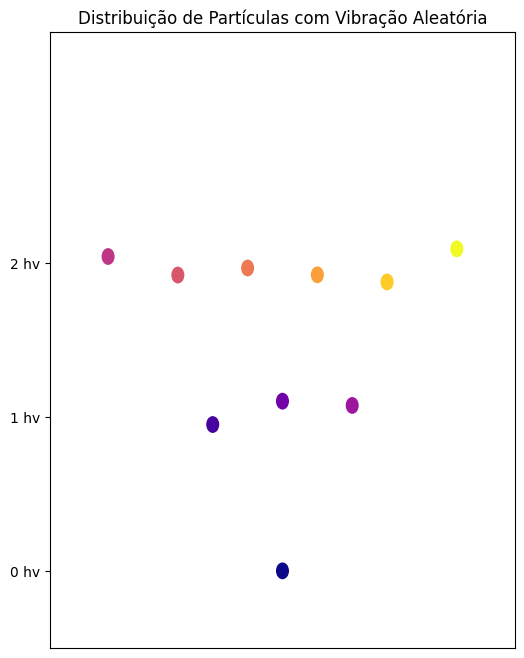

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parâmetros do sistema
n_particles = 10  # Número total de partículas
energy_distribution = [1, 3, 6]  # Distribuição de partículas por nível de energia
energy_levels = np.arange(0, len(energy_distribution))  # Níveis de energia
colors = plt.cm.plasma(np.linspace(0, 1, n_particles))  # Cores para as partículas

# Configuração da figura
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, len(energy_levels) + 0.5)
ax.set_xticks([])
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{n} hv" for n in energy_levels])
ax.set_title("Distribuição de Partículas com Vibração Aleatória")

# Lista de objetos gráficos para as partículas
particles = [plt.Circle((0, 0), 0.05, color=colors[i]) for i in range(n_particles)]
for particle in particles:
    ax.add_patch(particle)

# Função para calcular a posição inicial das partículas
def calculate_positions(energy_distribution):
    positions = []
    current_particle = 0
    for level, count in enumerate(energy_distribution):
        for i in range(count):
            offset = (i - (count - 1) / 2) * 0.6  # Distribui as partículas ao longo do nível de energia
            positions.append((offset, level))
            current_particle += 1
    return positions

# Posições calculadas para as partículas
positions = calculate_positions(energy_distribution)

# Parâmetros aleatórios para vibração
amplitudes = np.random.uniform(0.05, 0.15, n_particles)  # Amplitude aleatória entre 0.05 e 0.15
frequencies = np.random.uniform(0.2, 0.7, n_particles)  # Frequência aleatória entre 0.2 e 0.7

# Função de atualização para a animação
def update(frame):
    for i in range(n_particles):
        particle = particles[i]
        x, y = positions[i]
        # Variação aleatória da vibração para cada partícula
        y_vibration = y + amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * frame / 100)
        particle.center = (x, y_vibration)  # Aplica a vibração no nível de energia
    return particles

# Criação da animação
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Salvando o GIF
writer = PillowWriter(fps=20)
ani.save("vibra_aleato_fermi_gas.gif", writer=writer)

plt.show()


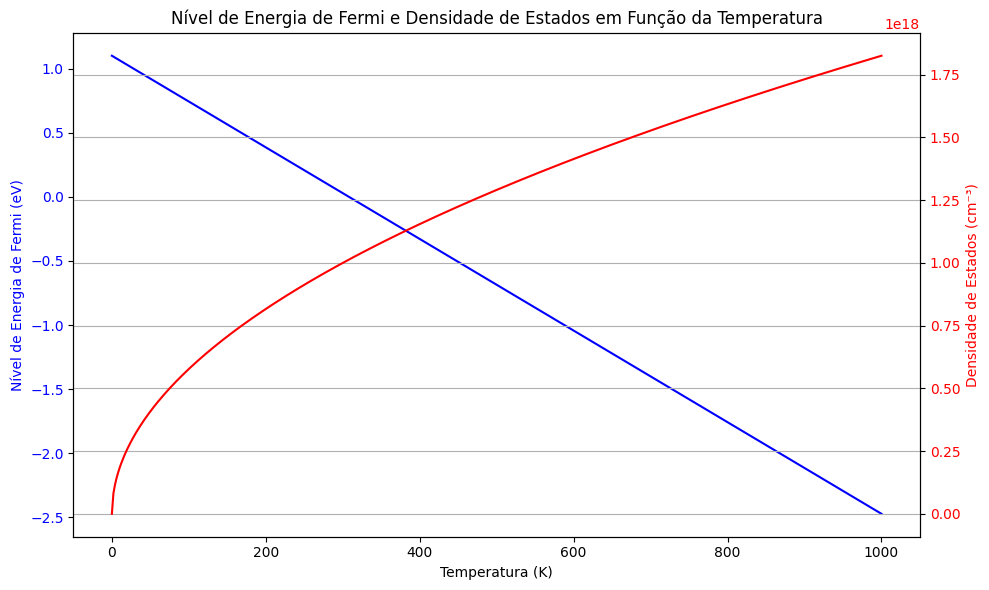

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
k_B = 8.617e-5  # Constante de Boltzmann em eV/K
E_f0 = 1.1  # Energia de Fermi em T = 0K (eV)
T = np.linspace(0, 1000, 500)  # Temperatura em Kelvin
n_c0 = 1e18  # Densidade de estados inicial na banda de condução (cm^-3)

# Função para calcular o nível de energia de Fermi
def fermi_energy(T, E_f0, n_c0):
    E_f_T = E_f0 - k_B * T * np.log(n_c0)
    return E_f_T

# Função para calcular a densidade de estados em função da temperatura
def density_of_states(T, n_c0):
    n_c_T = n_c0 * np.sqrt(T / 300)  # Assume que a densidade de estados cresce com a raiz quadrada da temperatura
    return n_c_T

# Calculando os níveis de energia de Fermi e a densidade de estados em função da temperatura
E_f_T = fermi_energy(T, E_f0, n_c0)
n_c_T = density_of_states(T, n_c0)

# Plotando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico do Nível de Energia de Fermi
ax1.set_xlabel('Temperatura (K)')
ax1.set_ylabel('Nível de Energia de Fermi (eV)', color='blue')
ax1.plot(T, E_f_T, label="Nível de Energia de Fermi", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando um segundo eixo y para a densidade de estados
ax2 = ax1.twinx()
ax2.set_ylabel('Densidade de Estados (cm⁻³)', color='red')
ax2.plot(T, n_c_T, label="Densidade de Estados", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título e grade
plt.title("Nível de Energia de Fermi e Densidade de Estados em Função da Temperatura")
fig.tight_layout()
plt.grid(True)

plt.show()

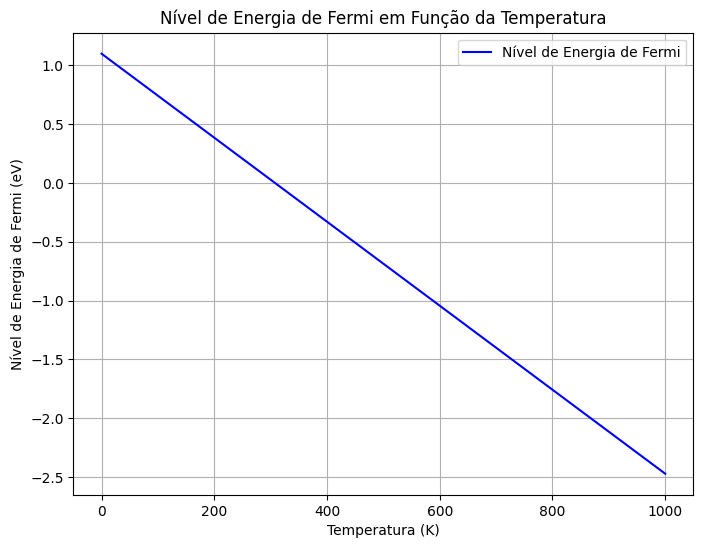

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
k_B = 8.617e-5  # Constante de Boltzmann em eV/K
E_f0 = 1.1  # Energia de Fermi em T = 0K (eV)
T = np.linspace(0, 1000, 500)  # Temperatura em Kelvin
n_c = 1e18  # Densidade de estados na banda de condução (cm^-3)

# Função para calcular o nível de energia de Fermi
def fermi_energy(T, E_f0, n_c):
    E_f_T = E_f0 - k_B * T * np.log(n_c)
    return E_f_T

# Calculando os níveis de energia de Fermi em função da temperatura
E_f_T = fermi_energy(T, E_f0, n_c)

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.plot(T, E_f_T, label="Nível de Energia de Fermi", color="blue")
plt.xlabel("Temperatura (K)")
plt.ylabel("Nível de Energia de Fermi (eV)")
plt.title("Nível de Energia de Fermi em Função da Temperatura")
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


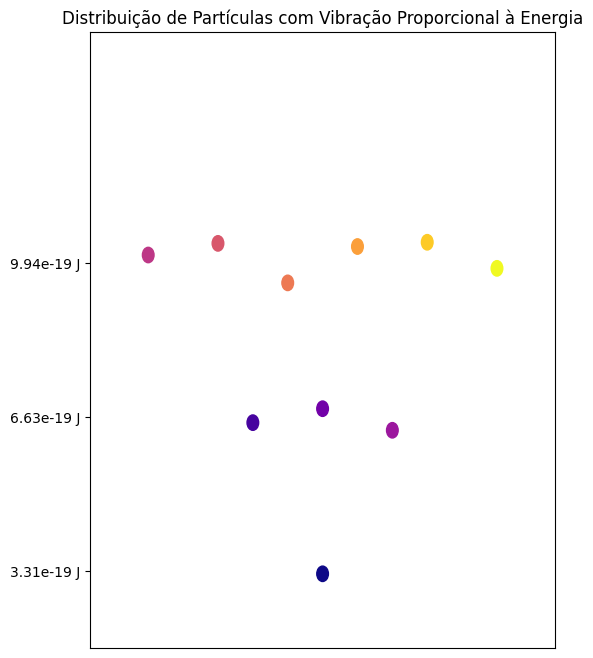

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parâmetros do sistema
n_particles = 10  # Número total de partículas
energy_distribution = [1, 3, 6]  # Distribuição de partículas por nível de energia
energy_levels = np.arange(0, len(energy_distribution))  # Níveis de energia
colors = plt.cm.plasma(np.linspace(0, 1, n_particles))  # Cores para as partículas

# Constantes físicas
h = 6.626e-34  # Constante de Planck (Joule-segundo)
nu = 5e14  # Frequência da radiação (Hertz)
hv_values = h * nu * (energy_levels + 1)  # Energia em cada nível de energia

# Configuração da figura
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, len(energy_levels) + 0.5)
ax.set_xticks([])
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{hv_values[i]:.2e} J" for i in range(len(hv_values))])
ax.set_title("Distribuição de Partículas com Vibração Proporcional à Energia")

# Lista de objetos gráficos para as partículas
particles = [plt.Circle((0, 0), 0.05, color=colors[i]) for i in range(n_particles)]
for particle in particles:
    ax.add_patch(particle)

# Função para calcular a posição inicial das partículas
def calculate_positions(energy_distribution):
    positions = []
    current_particle = 0
    for level, count in enumerate(energy_distribution):
        for i in range(count):
            offset = (i - (count - 1) / 2) * 0.6  # Distribui as partículas ao longo do nível de energia
            positions.append((offset, level))
            current_particle += 1
    return positions

# Posições calculadas para as partículas
positions = calculate_positions(energy_distribution)

# Parâmetros para vibração
amplitudes = hv_values / hv_values[-1] * 0.15  # Amplitude proporcional ao nível de energia
frequencies = np.random.uniform(0.2, 0.7, n_particles)  # Frequência aleatória entre 0.2 e 0.7

# Função de atualização para a animação
def update(frame):
    for i in range(n_particles):
        particle = particles[i]
        x, y = positions[i]
        # Variação aleatória da vibração para cada partícula, com amplitude crescente em níveis de energia mais altos
        y_vibration = y + amplitudes[positions[i][1]] * np.sin(2 * np.pi * frequencies[i] * frame / 100)
        particle.center = (x, y_vibration)  # Aplica a vibração no nível de energia
    return particles

# Criação da animação
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Salvando o GIF
writer = PillowWriter(fps=20)
ani.save("vibration_with_real_energy_values.gif", writer=writer)

plt.show()

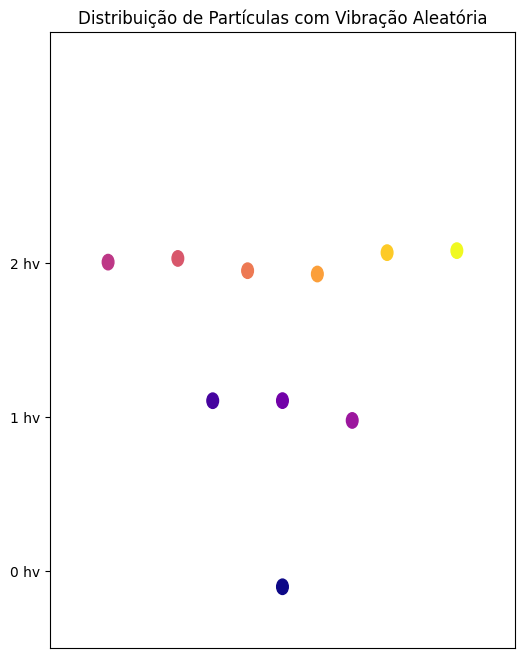

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parâmetros do sistema
n_particles = 10  # Número total de partículas
energy_distribution = [1, 3, 6]  # Distribuição de partículas por nível de energia
energy_levels = np.arange(0, len(energy_distribution))  # Níveis de energia
colors = plt.cm.plasma(np.linspace(0, 1, n_particles))  # Cores para as partículas

# Configuração da figura
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, len(energy_levels) + 0.5)
ax.set_xticks([])
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{n} hv" for n in energy_levels])
ax.set_title("Distribuição de Partículas com Vibração Aleatória")

# Lista de objetos gráficos para as partículas
particles = [plt.Circle((0, 0), 0.05, color=colors[i]) for i in range(n_particles)]
for particle in particles:
    ax.add_patch(particle)

# Função para calcular a posição inicial das partículas
def calculate_positions(energy_distribution):
    positions = []
    current_particle = 0
    for level, count in enumerate(energy_distribution):
        for i in range(count):
            offset = (i - (count - 1) / 2) * 0.6  # Distribui as partículas ao longo do nível de energia
            positions.append((offset, level))
            current_particle += 1
    return positions

# Posições calculadas para as partículas
positions = calculate_positions(energy_distribution)

# Parâmetros aleatórios para vibração
amplitudes = np.random.uniform(0.05, 0.15, n_particles)  # Amplitude aleatória entre 0.05 e 0.15
frequencies = np.random.uniform(0.2, 0.7, n_particles)  # Frequência aleatória entre 0.2 e 0.7

# Função de atualização para a animação
def update(frame):
    for i in range(n_particles):
        particle = particles[i]
        x, y = positions[i]
        # Variação aleatória da vibração para cada partícula
        y_vibration = y + amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * frame / 100)
        particle.center = (x, y_vibration)  # Aplica a vibração no nível de energia
    return particles

# Criação da animação
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Salvando o GIF
writer = PillowWriter(fps=20)
ani.save("vibra_aleato_fermi_gas.gif", writer=writer)

plt.show()

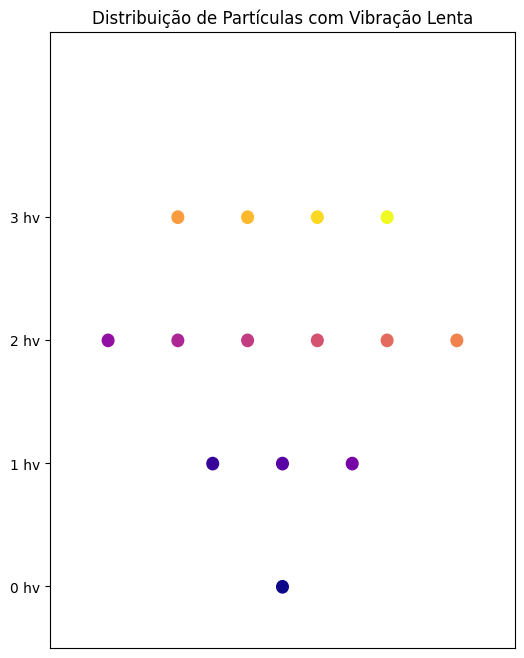

In [ ]:



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parâmetros do sistema
n_particles = 14  # Número total de partículas
energy_distribution = [1, 3, 6, 4]  # Distribuição de partículas por nível de energia
energy_levels = np.arange(0, len(energy_distribution))  # Níveis de energia
colors = plt.cm.plasma(np.linspace(0, 1, n_particles))  # Cores para as partículas

# Configuração da figura
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, len(energy_levels) + 0.5)
ax.set_xticks([])
ax.set_yticks(energy_levels)
ax.set_yticklabels([f"{n} hv" for n in energy_levels])
ax.set_title("Distribuição de Partículas com Vibração Lenta")

# Lista de objetos gráficos para as partículas
particles = [plt.Circle((0, 0), 0.05, color=colors[i]) for i in range(n_particles)]
for particle in particles:
    ax.add_patch(particle)

# Função para calcular a posição inicial das partículas
def calculate_positions(energy_distribution):
    positions = []
    current_particle = 0
    for level, count in enumerate(energy_distribution):
        for i in range(count):
            offset = (i - (count - 1) / 2) * 0.6  # Distribui as partículas ao longo do nível de energia
            positions.append((offset, level))
            current_particle += 1
    return positions

# Posições calculadas para as partículas
positions = calculate_positions(energy_distribution)

# Função de atualização para a animação
def update(frame):
    amplitude = 0.1  # Amplitude da vibração
    frequency = 0.5  # Frequência da vibração
    for i in range(n_particles):
        particle = particles[i]
        x, y = positions[i]
        y_vibration = y + amplitude * np.sin(2 * np.pi * frequency * frame / 100)
        particle.center = (x, y_vibration)  # Aplica a vibração no nível de energia
    return particles

# Criação da animação
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Salvando o GIF
writer = PillowWriter(fps=20)
ani.save("vibra_fermi_gas.gif", writer=writer)

plt.show()

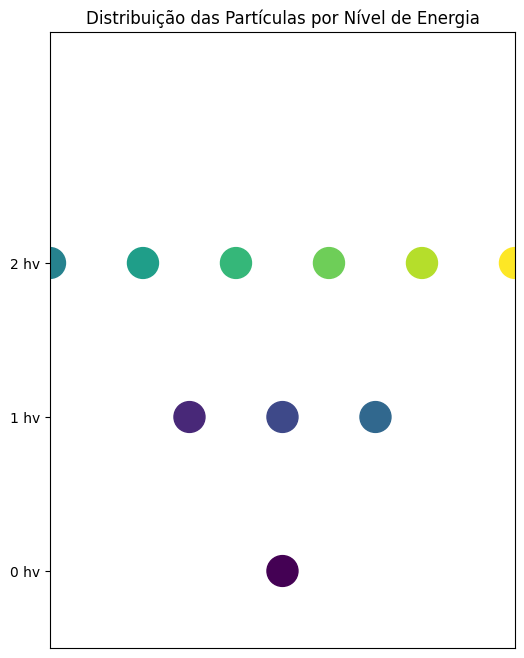

In [ ]:
importar  numpy  como  np
importar  matplotlib.pyplot  como  plt
de  matplotlib.animation  importar  FuncAnimation ,  PillowWriter

# Parâmetros do sistema
n_particles =  10 # Número de partículas
energy_distribution =  [ 1 , 3 , 6 ] # Número de partículas por nível de energia
energy_levels = np.arange ( 0 , len ( energy_distribution )) # Níveis de energia
colors = plt.cm .viridis ( np.linspace ( 0 , 1 ,  n_particles )) # Núcleos para as partículas

# Configuração da figura
fig ,  ax = plt.subplots ( figsize= ( 6 , 8 ))
ax.set_xlim ( -1.5 , 1.5 )
ax.set_ylim ( -0.5 , len ( energy_levels )  +  0.5 )
ax.set_xticks ([])
ax.set_yticks ( níveis de energia )
ax.set_yticklabels ([ f " { n }  hv" para  n  em níveis  de energia ])
ax.set_title ( "Distribuição das Partículas por Nível de Energia" )

# Lista de objetos gráficos para as partículas
particles =  [ plt.Circle (( 0 , 0 ), 0.1 ,  color=colors [ i ]) for  i  in range ( n_particles )]
for  particle  in  particles :
    ax.add_patch ( particle )

# Função para calcular a posição inicial das  partículas
def calculate_positions ( energy_distribution ) :
    positions =  []
    current_particle =  0 for  level ,  count  in enumerate ( energy_distribution ): for  i  in range ( count ):             offset =  ( i -  ( count -  1 )  /  2 )  *  0.6 # Distribui as partículas em torno do centro             positions.append (( offset ,  level ))             current_particle +=  1 return  positions







# Posições calculadas para as partículas
positions = calculator_positions ( energy_distribution )

# Função de atualização para a animação
def update ( frame ) :  for  i  in range ( frame +  1 ):         partícula = partículas [ i ]         partícula.center = posições [ i ] # Posiciona a partícula return  partículas





# Criação da animação
ani = FuncAnimation ( fig ,  update ,  frames=n_particles ,  interval= 500 ,  blit= True )

# Salvando o GIF
writer = PillowWriter ( fps= 2 )
ani.save ( "energy_fermi_gas.gif" ,  writer=writer )

plt.mostrar ()

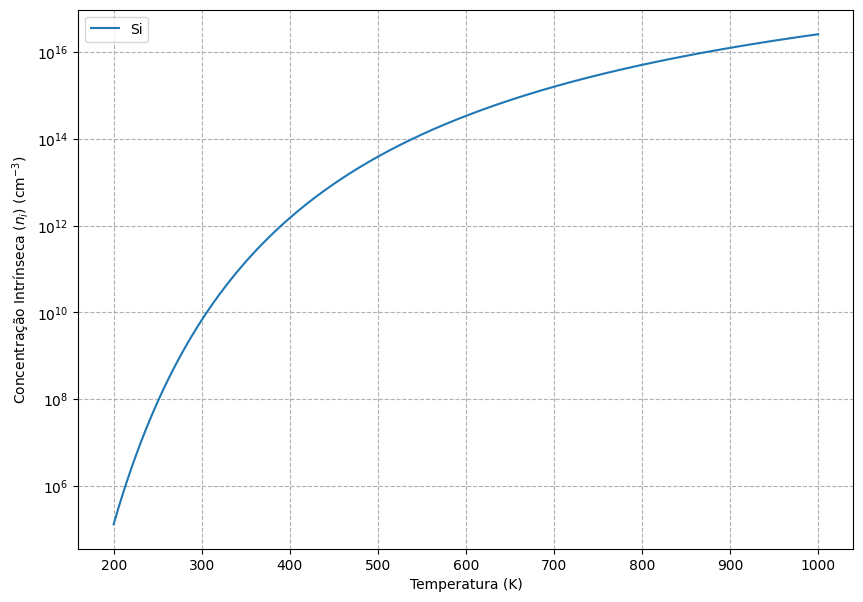

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Boltzmann em eV/K
k_B = 8.617333262145e-5

# Energias de gap (em eV) e densidades de estados efetivos (em cm^-3) para Si, Ge, GaAs
materials = {
    'Si': {'E_g': 1.12, 'N_c': 2.8e19, 'N_v': 1.04e19},
    #'Ge': {'E_g': 0.66, 'N_c': 1.04e19, 'N_v': 6.0e18},
    #'GaAs': {'E_g': 1.42, 'N_c': 4.7e17, 'N_v': 7.0e18}
}

# Temperaturas em Kelvin
T = np.linspace(200, 1000, 500)

# Função para calcular n_i(T)
def intrinsic_concentration(E_g, N_c, N_v, T):
    return np.sqrt(N_c * N_v) * np.exp(-E_g / (2 * k_B * T))

# Plotando os resultados
plt.figure(figsize=(10, 7))

for material, params in materials.items():
    n_i = intrinsic_concentration(params['E_g'], params['N_c'], params['N_v'], T)
    plt.plot(T, n_i, label=f'{material}')

plt.yscale('log')
plt.xlabel('Temperatura (K)')
plt.ylabel('Concentração Intrínseca ($n_i$) (cm$^{-3}$)')
#plt.title('Concentração Intrínseca vs. Temperatura para Si, Ge e GaAs')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


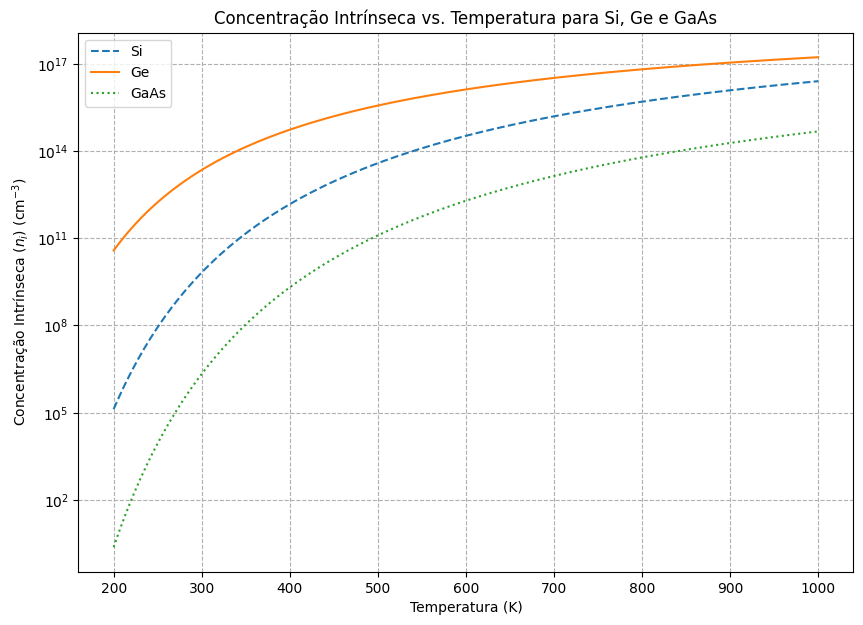

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Constante de Boltzmann em eV/K
k_B = 8.617333262145e-5

# Energias de gap (em eV) e densidades de estados efetivos (em cm^-3) para Si, Ge, GaAs
materials = {
    'Si': {'E_g': 1.12, 'N_c': 2.8e19, 'N_v': 1.04e19, 'style': '--'},
    'Ge': {'E_g': 0.66, 'N_c': 1.04e19, 'N_v': 6.0e18, 'style': '-'},
    'GaAs': {'E_g': 1.42, 'N_c': 4.7e17, 'N_v': 7.0e18, 'style': ':'}
}

# Temperaturas em Kelvin
T = np.linspace(200, 1000, 500)

# Função para calcular n_i(T)
def intrinsic_concentration(E_g, N_c, N_v, T):
    return np.sqrt(N_c * N_v) * np.exp(-E_g / (2 * k_B * T))

# Plotando os resultados
plt.figure(figsize=(10, 7))

for material, params in materials.items():
    n_i = intrinsic_concentration(params['E_g'], params['N_c'], params['N_v'], T)
    plt.plot(T, n_i, params['style'], label=f'{material}')

plt.yscale('log')


plt.xlabel('Temperatura (K)')
plt.ylabel('Concentração Intrínseca ($n_i$) (cm$^{-3}$)')
plt.title('Concentração Intrínseca vs. Temperatura para Si, Ge e GaAs')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


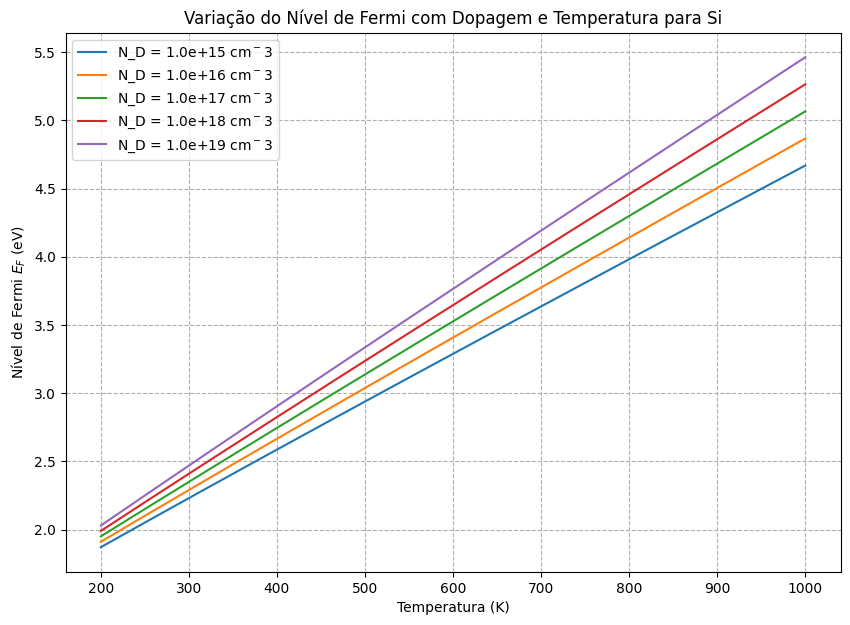

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k_B = 8.617333262145e-5  # eV/K
h = 4.135667696e-15  # eV·s (constante de Planck)
m_e = 9.10938356e-31  # kg (massa do elétron livre)
m_e_star = 0.26 * m_e  # massa efetiva do elétron em Si

# Energia da banda de condução para Si
E_C = 1.12  # eV

# Densidade de estados efetivos na banda de condução
def N_C(T):
    return 2 * ((2 * np.pi * m_e_star * k_B * T) / h**2)**(3/2)

# Nível de Fermi
def E_F(T, N_D):
    return E_C - k_B * T * np.log(N_C(T) / N_D)

# Temperaturas em Kelvin
T = np.linspace(200, 1000, 500)

# Concentrações de dopagem (em cm^-3)
dopings = [1e15, 1e16, 1e17, 1e18, 1e19]

# Plotando os resultados
plt.figure(figsize=(10, 7))

for N_D in dopings:
    E_F_T = E_F(T, N_D)
    plt.plot(T, E_F_T, label=f'N_D = {N_D:.1e} cm$^{-3}$')

plt.xlabel('Temperatura (K)')
plt.ylabel('Nível de Fermi $E_F$ (eV)')
plt.title('Variação do Nível de Fermi com Dopagem e Temperatura para Si')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Constantes
k_B = 8.617333262145e-5  # eV/K (constante de Boltzmann)
E_F = 0.5  # Energia de Fermi, podemos ajustar conforme necessário

# Função da distribuição de Fermi-Dirac
def fermi_dirac(E, T):
    return 1 / (np.exp((E - E_F) / (k_B * T)) + 1)

# Intervalo de energia
E = np.linspace(0, 1, 500)  # Energia variando de 0 a 1 eV

# Temperaturas para a simulação (em Kelvin)
temperatures = [50, 100, 200, 300, 500, 800, 1000, 1500, 2000]

# Lista para armazenar os frames do GIF
filenames = []

for T in temperatures:
    f_E = fermi_dirac(E, T)

    plt.figure(figsize=(8, 6))
    plt.plot(E, f_E, label=f'T = {T} K')
    plt.title('Distribuição de Fermi-Dirac')
    plt.xlabel('Energia (E)')
    plt.ylabel('f(E)')
    plt.ylim(0, 1.1)
    plt.legend()

    # Salvar o gráfico como imagem temporária
    filename = f'fermi_dirac_T_{T}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Criar o GIF
with imageio.get_writer('/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/fermi_dirac_distribution.gif', mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpar as imagens temporárias
import os
for filename in filenames:
    os.remove(filename)

print("GIF criado com sucesso: fermi_dirac_distribuição.gif")


<ipython-input-1-476240a2be40>:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF criado com sucesso: fermi_dirac_distribution.gif


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constantes
k = 8.617333262145e-5  # eV/K

# Função da distribuição Fermi-Dirac
def fermi_dirac(E, E_F, T):
    return 1 / (np.exp((E - E_F) / (k * T)) + 1)

# Intervalo de energia
E = np.linspace(0, 1, 500)  # Energia em eV

# Configura a figura e o eixo
fig, ax = plt.subplots()
line, = ax.plot(E, fermi_dirac(E, 0.1, 300), label=f'T = 300 K, E_F = 0.1 eV')
ax.set_xlabel('Energia (eV)')
ax.set_ylabel('f(E)')
ax.set_title('Distribuição Fermi-Dirac')
ax.legend()
ax.grid(True)

# Função de atualização da animação
def update(frame):
    T = 100 + frame  # Temperatura varia de 100 K a 400 K
    E_F = 0.1 + frame * 0.001  # Energia de Fermi varia levemente
    f_E = fermi_dirac(E, E_F, T)
    line.set_ydata(f_E)
    ax.set_title(f'Distribuição Fermi-Dirac\nT = {T:.1f} K, E_F = {E_F:.3f} eV')
    return line,

# Cria a animação
ani = animation.FuncAnimation(fig, update, frames=300, interval=50, blit=True)

# Salva a animação
ani.save('fermi_dirac_animação.mp4', writer='ffmpeg')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k_B = 8.617333262145e-5  # Constante de Boltzmann em eV/K
T = 300  # Temperatura em Kelvin
E_F = 0.1  # Energia de Fermi em eV

# Faixa de energias para análise
E = np.linspace(0, 1, 500)  # Energia em eV

# Função Fermi-Dirac
def fermi_dirac(E, E_F, T):
    return 1 / (np.exp((E - E_F) / (k_B * T)) + 1)

# Calculando a distribuição
f_E = fermi_dirac(E, E_F, T)

# Plotando a distribuição
plt.plot(E, f_E, label=f'T = {T} K, E_F = {E_F} eV')
plt.xlabel('Energia (eV)')
plt.ylabel('f(E)')
plt.title('Distribuição Fermi-Dirac')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Constantes
k_B = 8.617333262145e-5  # eV/K (constante de Boltzmann)
E_F = 0.5  # Energia de Fermi

# Função da distribuição de Fermi-Dirac
def fermi_dirac(E, T):
    return 1 / (np.exp((E - E_F) / (k_B * T)) + 1)

# Intervalo de energia
E = np.linspace(0, 1, 500)  # Energia variando de 0 a 1 eV

# Temperaturas para a simulação (em Kelvin)
temperatures = [50, 100, 200, 300, 500, 800, 1000, 1500, 2000]

# Lista para armazenar os frames do GIF
filenames = []

for T in temperatures:
    f_E = fermi_dirac(E, T)

    plt.figure(figsize=(8, 6))
    plt.plot(E, f_E, label=f'T = {T} K')
    plt.title('Distribuição de Fermi-Dirac')
    plt.xlabel('Energia (E)')
    plt.ylabel('f(E)')
    plt.ylim(0, 1.1)
    plt.legend()

    # Salvar o gráfico como imagem temporária
    filename = f'fermi_dirac_T_{T}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Criar o GIF com maior duração entre os frames
with imageio.get_writer('/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/fermi_dirac_distribution_slow.gif', mode='I', duration=5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpar as imagens temporárias
import os
for filename in filenames:
    os.remove(filename)

print("GIF criado com sucesso: fermi_dirac_distribution_slow.gif")


<ipython-input-3-84b12a9e169f>:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF criado com sucesso: fermi_dirac_distribution_slow.gif


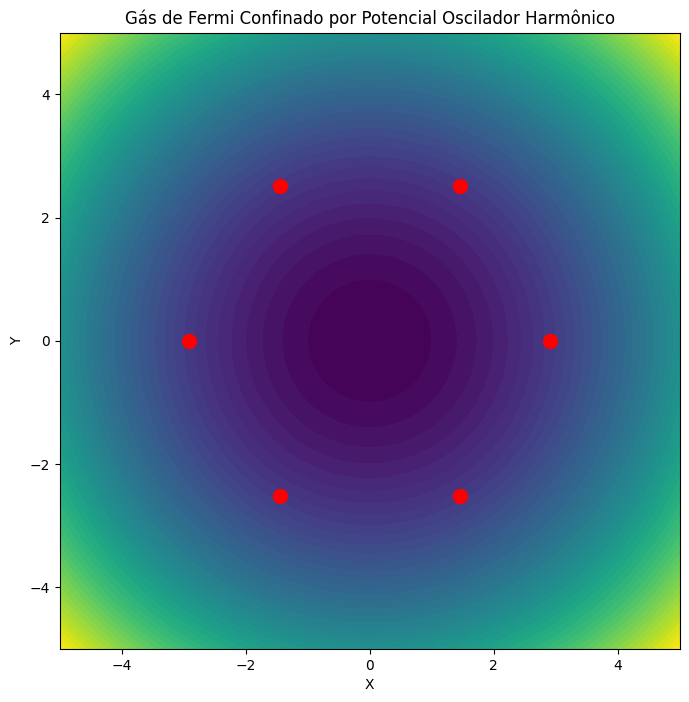

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

# Configuração do potencial oscilador harmônico
def potential(x, y):
    return 0.5 * (x**2 + y**2)

# Parâmetros
num_frames = 100
num_particles = 6
radius = 3  # Raio de confinamento das partículas

# Configuração do grid e potencial
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

# Função de atualização da animação
def update(frame):
    ax.clear()

    # Contorno do potencial
    contour = ax.contourf(X, Y, Z, cmap='viridis', levels=50)

    # Calcular a posição das partículas
    angle = 2 * np.pi * np.arange(num_particles) / num_particles
    oscillation = 1 + 0.5 * np.sin(2 * np.pi * frame / num_frames)  # Oscilação das partículas
    x_positions = radius * oscillation * np.cos(angle)
    y_positions = radius * oscillation * np.sin(angle)

    # Plotar as partículas
    scatter = ax.scatter(x_positions, y_positions, c='red', s=100)

    # Ajustes do gráfico
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gás de Fermi Confinado por Potencial Oscilador Harmônico')

    return scatter,

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# Salvamento da animação como um arquivo GIF
ani.save('/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/fermi_gas_with_particles.gif', writer='pillow', fps=20)

plt.show()


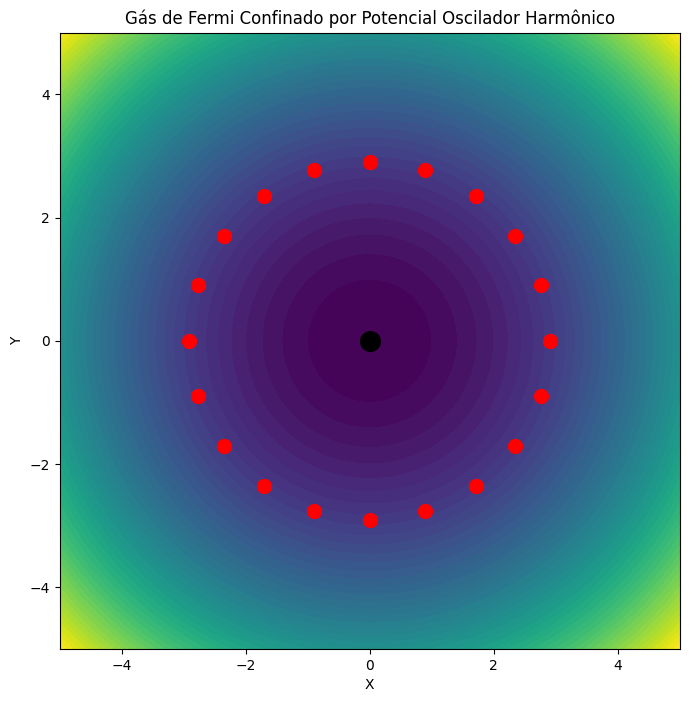

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

# Configuração do potencial oscilador harmônico
def potential(x, y):
    return 0.5 * (x**2 + y**2)

# Parâmetros
num_frames = 100
num_particles = 20
radius = 3  # Raio de confinamento das partículas

# Configuração do grid e potencial
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

# Função de atualização da animação
def update(frame):
    ax.clear()

    # Contorno do potencial
    contour = ax.contourf(X, Y, Z, cmap='viridis', levels=50)

    # Calcular a posição das partículas
    angle = 2 * np.pi * np.arange(num_particles) / num_particles
    oscillation = 1 + 0.5 * np.sin(2 * np.pi * frame / num_frames)  # Oscilação das partículas
    x_positions = radius * oscillation * np.cos(angle)
    y_positions = radius * oscillation * np.sin(angle)

    # Plotar as partículas
    scatter = ax.scatter(x_positions, y_positions, c='red', s=100)

    # Adicionar partícula central
    ax.scatter(0, 0, c='black', s=200)  # Partícula preta no centro

    # Ajustes do gráfico
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gás de Fermi Confinado por Potencial Oscilador Harmônico')

    return scatter,

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# Salvamento da animação como um arquivo GIF
ani.save('/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/fermi_gas_with_center_particle.gif', writer='pillow', fps=20)

plt.show()


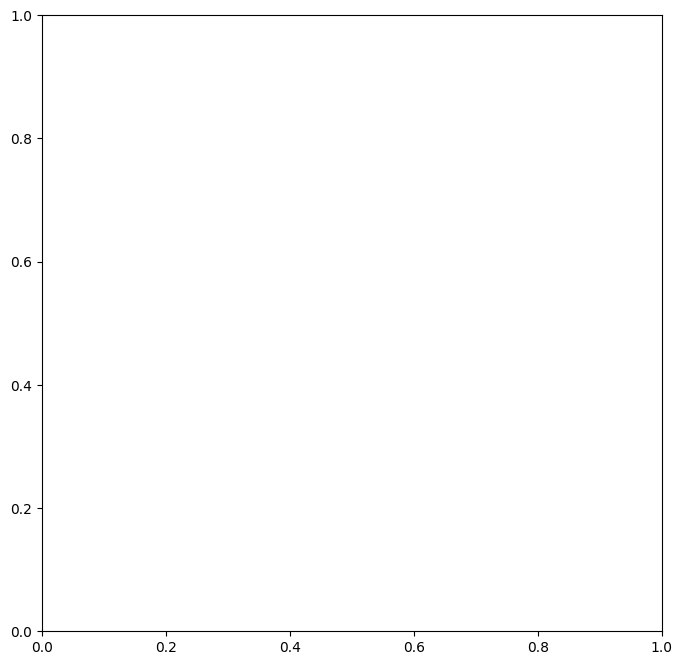

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configuração do potencial oscilador harmônico
def potential(x, y):
    return 0.5 * (x**2 + y**2)

# Parâmetros
num_frames = 100
num_particles = 20
radius = 2  # Raio de confinamento das partículas (diminuído)

# Configuração do grid e potencial
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = potential(X, Y)

fig, ax = plt.subplots(figsize=(8, 8))

# Função de atualização da animação
def update(frame):
    ax.clear()

    # Contorno do potencial
    ax.contourf(X, Y, Z, cmap='viridis', levels=50)

    # Calcular a posição das partículas
    angle = 2 * np.pi * np.arange(num_particles) / num_particles
    oscillation = 1 + 0.3 * np.sin(2 * np.pi * frame / num_frames)  # Oscilação das partículas (amplitude diminuída)
    x_positions = radius * oscillation * np.cos(angle)
    y_positions = radius * oscillation * np.sin(angle)

    # Plotar as partículas
    ax.scatter(x_positions, y_positions, c='red', s=100)

    # Adicionar partícula central e letra "O"
    ax.scatter(0, 0, c='black', s=200)  # Partícula preta no centro
    ax.text(0, 0, 'O', color='black', fontsize=16, ha='center', va='center')  # Letra "O" no centro

    # Ajustes do gráfico
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Gás de Fermi Confinado por Potencial Oscilador Harmônico')

    return ax,

# Criação da animação
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=False)

# Exibir a animação
plt.show()


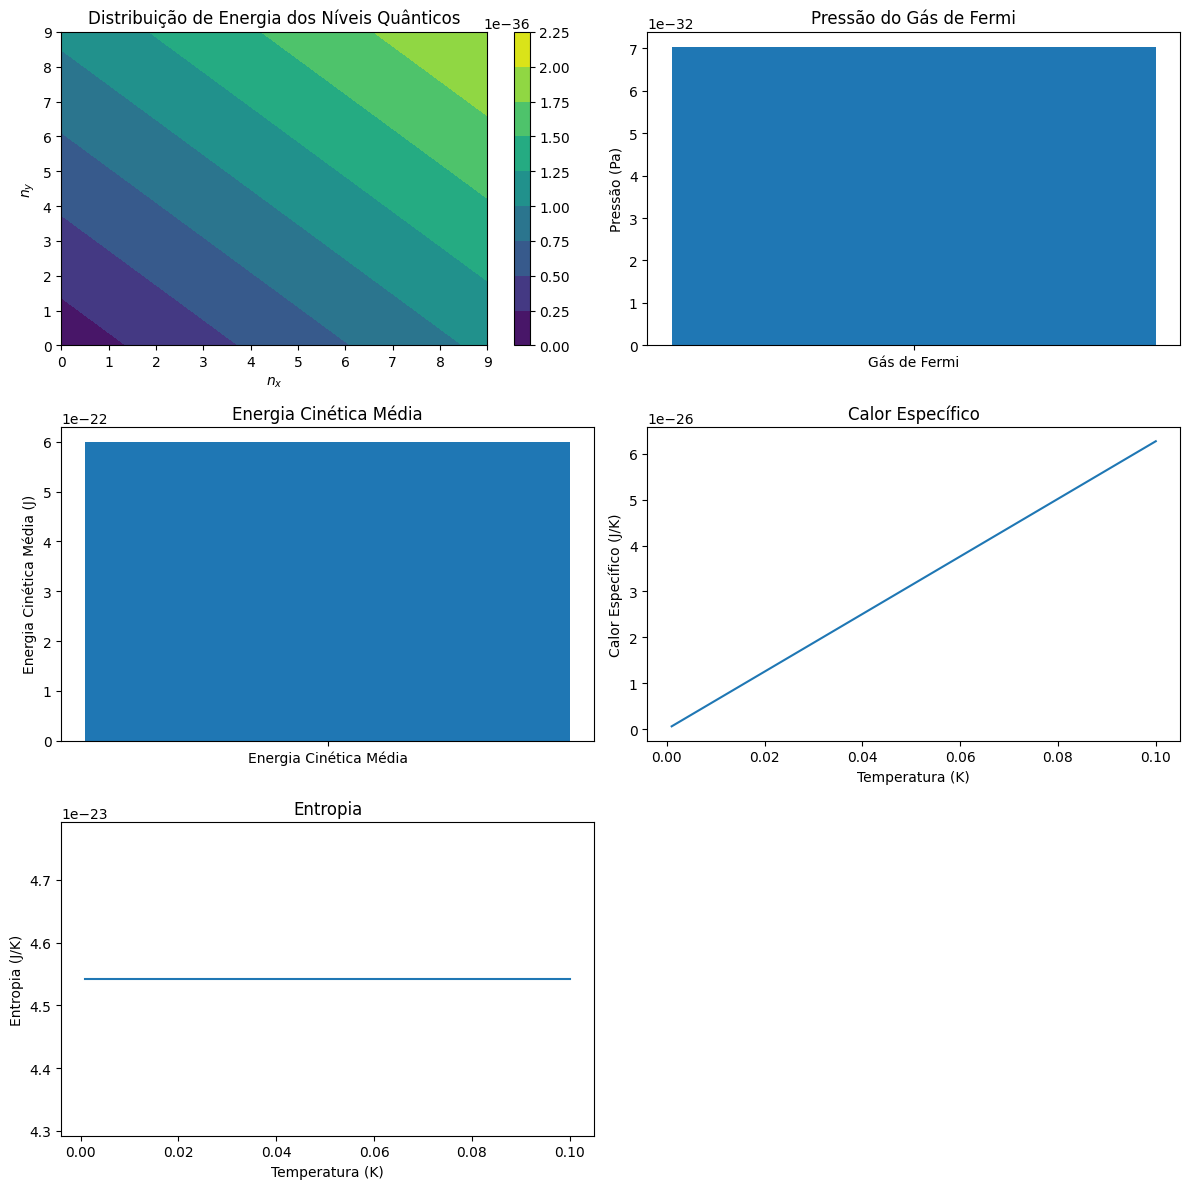

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo constantes
hbar = 1.0545718e-34  # Constante de Planck reduzida (J.s)
omega = 1e-3  # Frequência do oscilador harmônico (rad/s)
k_B = 1.380649e-23  # Constante de Boltzmann (J/K)
E_F = 1e-21  # Energia de Fermi (J)

# Distribuição de Energia
n_x = np.arange(0, 10)
n_y = np.arange(0, 10)
N_x, N_y = np.meshgrid(n_x, n_y)
E = hbar * omega * (N_x + 0.5) + hbar * omega * (N_y + 0.5)

# Equação de Estado
V = 1e-3  # Volume (m^3)
E_cin = np.sum(E)  # Energia cinética total
P = (2 / 3) * E_cin / V

# Energia Cinética Média
E_cin_media = (3 / 5) * E_F

# Calor Específico
T = np.linspace(1e-3, 1e-1, 100)  # Temperatura (K)
C_V = (np.pi**2 / 3) * (k_B**2 * T) / E_F

# Entropia
S = k_B * (E_F / T) * (np.pi**2 / 3 * (T / E_F))

# Plotando os gráficos
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico da Distribuição de Energia
c = axs[0, 0].contourf(N_x, N_y, E, cmap='viridis')
fig.colorbar(c, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de Energia dos Níveis Quânticos')
axs[0, 0].set_xlabel('$n_x$')
axs[0, 0].set_ylabel('$n_y$')

# Gráfico da Equação de Estado
axs[0, 1].bar(['Gás de Fermi'], [P])
axs[0, 1].set_title('Pressão do Gás de Fermi')
axs[0, 1].set_ylabel('Pressão (Pa)')

# Gráfico da Energia Cinética Média
axs[1, 0].bar(['Energia Cinética Média'], [E_cin_media])
axs[1, 0].set_title('Energia Cinética Média')
axs[1, 0].set_ylabel('Energia Cinética Média (J)')

# Gráfico do Calor Específico
axs[1, 1].plot(T, C_V)
axs[1, 1].set_title('Calor Específico')
axs[1, 1].set_xlabel('Temperatura (K)')
axs[1, 1].set_ylabel('Calor Específico (J/K)')

# Gráfico da Entropia
axs[2, 0].plot(T, S)
axs[2, 0].set_title('Entropia')
axs[2, 0].set_xlabel('Temperatura (K)')
axs[2, 0].set_ylabel('Entropia (J/K)')

# Remover o último subgráfico vazio
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()


<ipython-input-14-e8c878d21386>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((E - mu) / (k_B * T)) + 1)


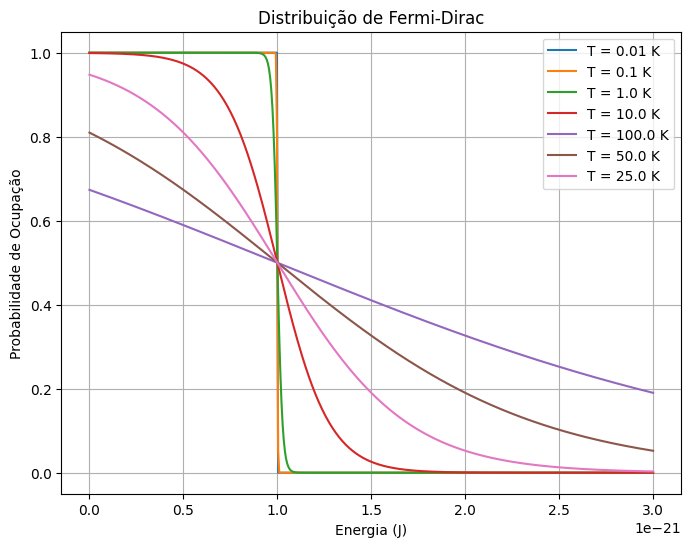

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo constantes
k_B = 1.380649e-23  # Constante de Boltzmann (J/K)
mu = 1e-21  # Potencial químico ou energia de Fermi (J)

# Definindo a faixa de energias e temperaturas
E = np.linspace(0, 3e-21, 500)  # Energias (J)
T_values = [0.01, 0.1, 1.0, 10.0, 100.0, 50.0, 25.0]  # Temperaturas (K)

# Função da distribuição de Fermi-Dirac
def fermi_dirac(E, mu, T):
    return 1 / (np.exp((E - mu) / (k_B * T)) + 1)

# Plotando a distribuição de Fermi-Dirac para diferentes temperaturas
plt.figure(figsize=(8, 6))
for T in T_values:
    f_E = fermi_dirac(E, mu, T)
    plt.plot(E, f_E, label=f'T = {T} K')

plt.title('Distribuição de Fermi-Dirac')
plt.xlabel('Energia (J)')
plt.ylabel('Probabilidade de Ocupação')
plt.legend()
plt.grid(True)
plt.show()


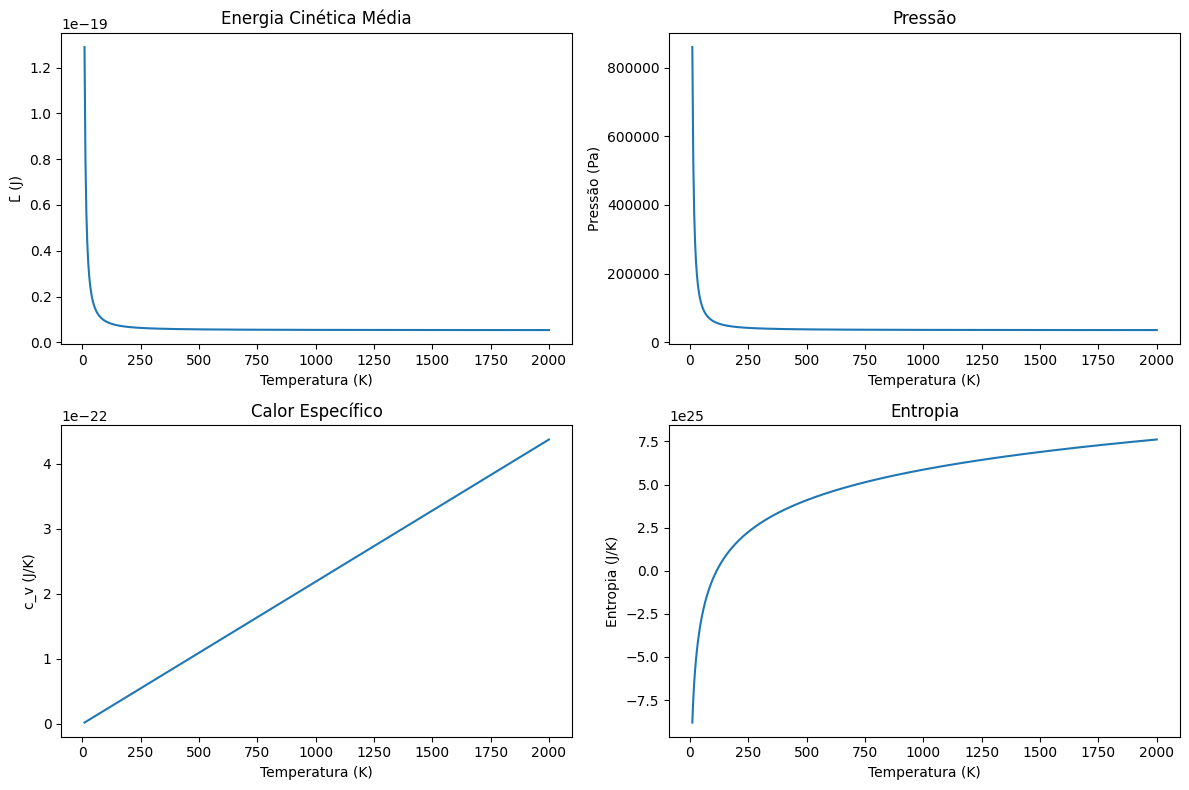

<ipython-input-1-f85251bac324>:84: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Simulação e GIF criados com sucesso.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Constantes
h = 6.62607015e-34  # Constante de Planck em J.s
k_B = 1.380649e-23  # Constante de Boltzmann em J/K
m = 9.10938356e-31  # Massa do elétron em kg (exemplo)
n = 1e25  # Densidade de moléculas (exemplo)

# Função P(x) aproximada (para simplificação)
def P(x):
    return 1 + (1/16)*(h**3*n/((np.pi*m*k_B*x)**(3/2)))

# Temperaturas para a simulação (em Kelvin)
temperatures = np.linspace(10, 2000, 500)

# Energia cinética média
L_mean = (3*h**2*n**(2/3))/(4*np.pi*m) * P(temperatures)

# Pressão
pressure = (h**2*n**(5/3))/(2*np.pi*m) * P(temperatures)

# Calor específico
c_v = ((16*np.pi**8)/9)**(1/3) * (m*k_B**2)/(h**2*n**(2/3)) * temperatures

# Entropia
entropy = n * (2.5*np.log(temperatures) - np.log(pressure) +
               np.log((2*np.pi*m)**1.5 * k_B**2.5 * np.exp(2.5) / h**3))

# Plotando os resultados
plt.figure(figsize=(12, 8))

# Energia Cinética Média
plt.subplot(2, 2, 1)
plt.plot(temperatures, L_mean)
plt.title('Energia Cinética Média')
plt.xlabel('Temperatura (K)')
plt.ylabel('L̄ (J)')

# Pressão
plt.subplot(2, 2, 2)
plt.plot(temperatures, pressure)
plt.title('Pressão')
plt.xlabel('Temperatura (K)')
plt.ylabel('Pressão (Pa)')

# Calor Específico
plt.subplot(2, 2, 3)
plt.plot(temperatures, c_v)
plt.title('Calor Específico')
plt.xlabel('Temperatura (K)')
plt.ylabel('c_v (J/K)')

# Entropia
plt.subplot(2, 2, 4)
plt.plot(temperatures, entropy)
plt.title('Entropia')
plt.xlabel('Temperatura (K)')
plt.ylabel('Entropia (J/K)')

plt.tight_layout()
plt.show()

# Criando o GIF
filenames = []
for i in range(len(temperatures)):
    plt.figure(figsize=(8, 6))
    plt.plot(temperatures[:i+1], L_mean[:i+1], label='Energia Cinética Média')
    plt.plot(temperatures[:i+1], pressure[:i+1], label='Pressão')
    plt.plot(temperatures[:i+1], c_v[:i+1], label='Calor Específico')
    plt.plot(temperatures[:i+1], entropy[:i+1], label='Entropia')
    plt.xlabel('Temperatura (K)')
    plt.ylabel('Magnitude')
    plt.title(f'Propriedades do Gás em T = {temperatures[i]:.1f} K')
    plt.legend()
    filename = f'plot_{i}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

with imageio.get_writer('/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/gas_simulation.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Limpeza das imagens temporárias
import os
for filename in filenames:
    os.remove(filename)

print("Simulação e GIF criados com sucesso.")


<ipython-input-2-2c0ddb1354fc>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-2-2c0ddb1354fc>:41: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-2-2c0ddb1354fc>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-2-2c0ddb1354fc>:47: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor.gif'

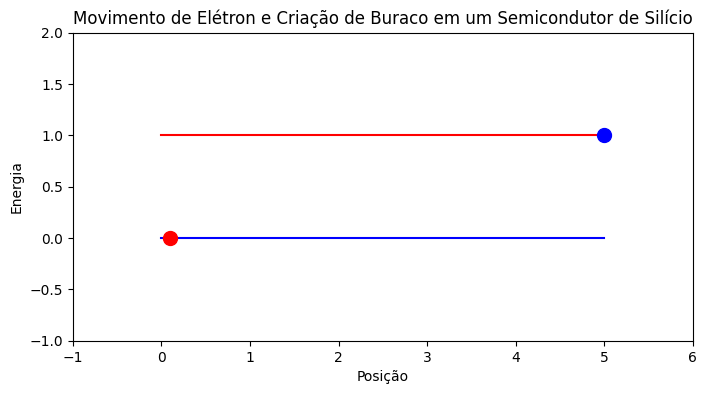

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor de Silício')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar as bandas de valência e condução
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco

# Função de animação
def animate(i):
    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-4-01e27998d76c>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-4-01e27998d76c>:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-4-01e27998d76c>:59: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-4-01e27998d76c>:60: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor_updated.gif'

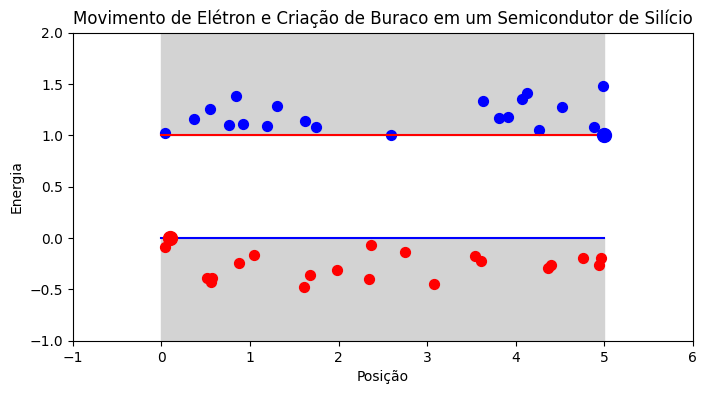

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor de Silício')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
valencia_particles_x = np.random.uniform(0, 5, 20)
valencia_particles_y = np.random.uniform(-0.5, 0, 20)
conducao_particles_x = np.random.uniform(0, 5, 20)
conducao_particles_y = np.random.uniform(1, 1.5, 20)

ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco

# Função de animação
def animate(i):
    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_updated.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-6-33c54f3b83b7>:68: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-6-33c54f3b83b7>:73: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-6-33c54f3b83b7>:78: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-6-33c54f3b83b7>:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor_temperatura.gif'

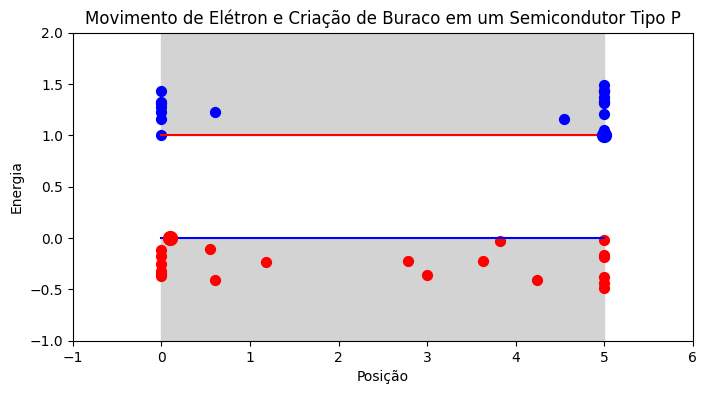

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
valencia_particles_x = np.random.uniform(0, 5, 20)
valencia_particles_y = np.random.uniform(-0.5, 0, 20)
conducao_particles_x = np.random.uniform(0, 5, 20)
conducao_particles_y = np.random.uniform(1, 1.5, 20)

# Inicializar os vetores de velocidade das partículas
valencia_velocities_x = np.random.uniform(-0.05, 0.05, 20)
conducao_velocities_x = np.random.uniform(-0.05, 0.05, 20)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 100  # Aumenta a temperatura com o tempo

    # Atualizar posições das partículas com movimento vibracional
    global valencia_particles_x, conducao_particles_x
    valencia_particles_x += valencia_velocities_x * temperature_factor
    conducao_particles_x += conducao_velocities_x * temperature_factor

    # Manter partículas dentro dos limites
    valencia_particles_x = np.clip(valencia_particles_x, 0, 5)
    conducao_particles_x = np.clip(conducao_particles_x, 0, 5)

    valencia_particles.set_offsets(np.c_[valencia_particles_x, valencia_particles_y])
    conducao_particles.set_offsets(np.c_[conducao_particles_x, conducao_particles_y])

    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_temperatura.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-8-33c54f3b83b7>:68: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-8-33c54f3b83b7>:73: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-8-33c54f3b83b7>:78: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-8-33c54f3b83b7>:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor_temperatura.gif'

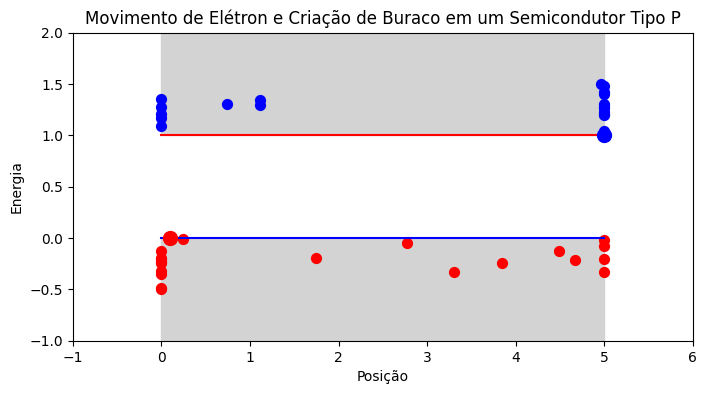

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
valencia_particles_x = np.random.uniform(0, 5, 20)
valencia_particles_y = np.random.uniform(-0.5, 0, 20)
conducao_particles_x = np.random.uniform(0, 5, 20)
conducao_particles_y = np.random.uniform(1, 1.5, 20)

# Inicializar os vetores de velocidade das partículas
valencia_velocities_x = np.random.uniform(-0.05, 0.05, 20)
conducao_velocities_x = np.random.uniform(-0.05, 0.05, 20)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 100  # Aumenta a temperatura com o tempo

    # Atualizar posições das partículas com movimento vibracional
    global valencia_particles_x, conducao_particles_x
    valencia_particles_x += valencia_velocities_x * temperature_factor
    conducao_particles_x += conducao_velocities_x * temperature_factor

    # Manter partículas dentro dos limites
    valencia_particles_x = np.clip(valencia_particles_x, 0, 5)
    conducao_particles_x = np.clip(conducao_particles_x, 0, 5)

    valencia_particles.set_offsets(np.c_[valencia_particles_x, valencia_particles_y])
    conducao_particles.set_offsets(np.c_[conducao_particles_x, conducao_particles_y])

    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_temperatura.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-10-6bd99b50d184>:78: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-10-6bd99b50d184>:83: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-10-6bd99b50d184>:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-10-6bd99b50d184>:89: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor_temperatura_vibracao.gif'

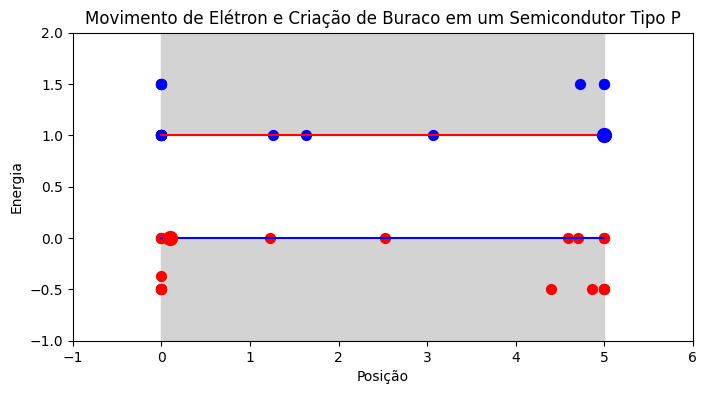

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
valencia_particles_x = np.random.uniform(0, 5, 20)
valencia_particles_y = np.random.uniform(-0.5, 0, 20)
conducao_particles_x = np.random.uniform(0, 5, 20)
conducao_particles_y = np.random.uniform(1, 1.5, 20)

# Inicializar os vetores de velocidade das partículas
valencia_velocities_x = np.random.uniform(-0.05, 0.05, 20)
conducao_velocities_x = np.random.uniform(-0.05, 0.05, 20)
valencia_velocities_y = np.random.uniform(-0.02, 0.02, 20)
conducao_velocities_y = np.random.uniform(-0.02, 0.02, 20)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 100  # Aumenta a temperatura com o tempo

    # Atualizar posições das partículas com movimento vibracional
    global valencia_particles_x, valencia_particles_y, conducao_particles_x, conducao_particles_y

    # Movimento horizontal + ajuste de temperatura
    valencia_particles_x += valencia_velocities_x * temperature_factor
    conducao_particles_x += conducao_velocities_x * temperature_factor

    # Movimento vertical (oscilações)
    valencia_particles_y += valencia_velocities_y * temperature_factor * 0.5
    conducao_particles_y += conducao_velocities_y * temperature_factor * 0.5

    # Manter partículas dentro dos limites
    valencia_particles_x = np.clip(valencia_particles_x, 0, 5)
    conducao_particles_x = np.clip(conducao_particles_x, 0, 5)
    valencia_particles_y = np.clip(valencia_particles_y, -0.5, 0)
    conducao_particles_y = np.clip(conducao_particles_y, 1, 1.5)

    valencia_particles.set_offsets(np.c_[valencia_particles_x, valencia_particles_y])
    conducao_particles.set_offsets(np.c_[conducao_particles_x, conducao_particles_y])

    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_temperatura_vibracao.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-13-4de5f12ee570>:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-13-4de5f12ee570>:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-13-4de5f12ee570>:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-13-4de5f12ee570>:80: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 100) * 0.1, 0)


'eletron_semicondutor_corrigido.gif'

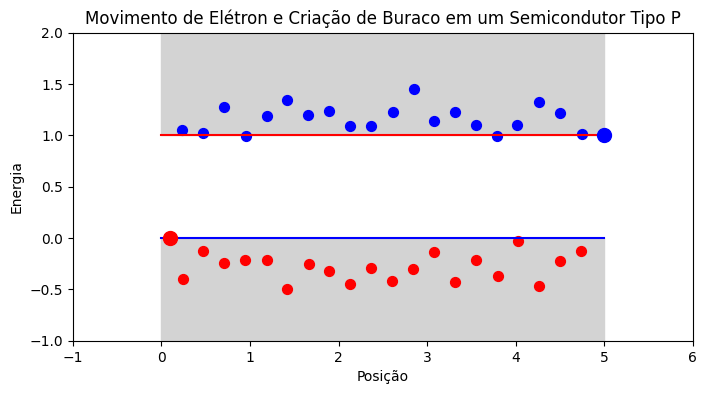

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
num_particles = 20
valencia_particles_x = np.linspace(0.25, 4.75, num_particles)
valencia_particles_y = np.random.uniform(-0.5, 0, num_particles)
conducao_particles_x = np.linspace(0.25, 4.75, num_particles)
conducao_particles_y = np.random.uniform(1, 1.5, num_particles)

# Inicializar as amplitudes das vibrações
valencia_amplitude_x = np.random.uniform(0.02, 0.1, num_particles)
valencia_amplitude_y = np.random.uniform(0.02, 0.1, num_particles)
conducao_amplitude_x = np.random.uniform(0.02, 0.1, num_particles)
conducao_amplitude_y = np.random.uniform(0.02, 0.1, num_particles)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 100  # Aumenta a temperatura com o tempo

    # Atualizar posições das partículas com vibração em torno da posição original
    valencia_new_x = valencia_particles_x + valencia_amplitude_x * np.sin(2 * np.pi * i / 30)
    valencia_new_y = valencia_particles_y + valencia_amplitude_y * np.sin(2 * np.pi * i / 30)

    conducao_new_x = conducao_particles_x + conducao_amplitude_x * np.sin(2 * np.pi * i / 30)
    conducao_new_y = conducao_particles_y + conducao_amplitude_y * np.sin(2 * np.pi * i / 30)

    valencia_particles.set_offsets(np.c_[valencia_new_x, valencia_new_y])
    conducao_particles.set_offsets(np.c_[conducao_new_x, conducao_new_y])

    if i < 50:  # Movimento do elétron na banda de valência
        x = i * 0.1
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 100:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 50) * 0.02
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 100) * 0.1, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=150, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_corrigido.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


NameError: name 'conducaoparticles_y' is not defined

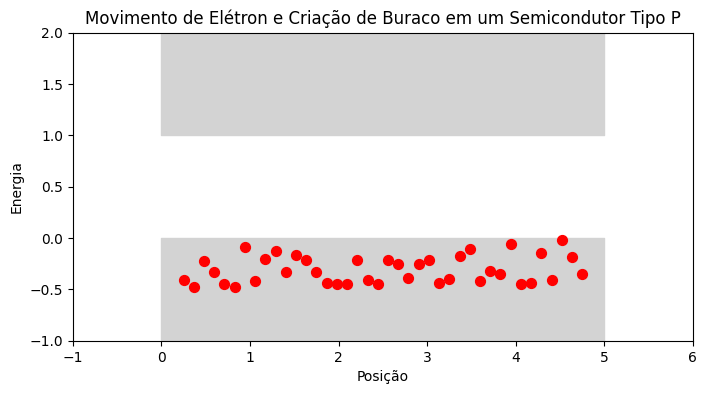

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
num_particles = 40
valencia_particles_x = np.linspace(0.25, 4.75, num_particles)
valencia_particles_y = np.random.uniform(-0.5, 0, num_particles)
conducao_particles_x = np.linspace(0.25, 4.75, num_particles)
conducao_particles_y = np.random.uniform(1, 1.5, num_particles)

# Inicializar as amplitudes das vibrações
valencia_amplitude_x = np.random.uniform(0.05, 0.2, num_particles)
valencia_amplitude_y = np.random.uniform(0.02, 0.05, num_particles)
conducao_amplitude_x = np.random.uniform(0.05, 0.2, num_particles)
conducao_amplitude_y = np.random.uniform(0.02, 0.05, num_particles)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducaoparticles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 50  # Aumenta a temperatura mais rapidamente

    # Atualizar posições das partículas com vibração em torno da posição original
    valencia_new_x = valencia_particles_x + valencia_amplitude_x * np.sin(2 * np.pi * i / 30)
    valencia_new_y = valencia_particles_y + valencia_amplitude_y * np.sin(2 * np.pi * i / 30)

    conducao_new_x = conducao_particles_x + conducao_amplitude_x * np.sin(2 * np.pi * i / 30)
    conducao_new_y = conducao_particles_y + conducao_amplitude_y * np.sin(2 * np.pi * i / 30)

    valencia_particles.set_offsets(np.c_[valencia_new_x, valencia_new_y])
    conducao_particles.set_offsets(np.c_[conducao_new_x, conducao_new_y])

    if i < 30:  # Movimento do elétron na banda de valência
        x = i * 0.15
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 60:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 30) * 0.05
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 60) * 0.15, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=100, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "eletron_semicondutor_vibracao_osc_harmonico.gif"
ani.save(gif_path, writer='imagemagick')

gif_path


<ipython-input-16-368e12406d32>:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-16-368e12406d32>:74: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-16-368e12406d32>:79: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  eletron.set_data(x, y)
<ipython-input-16-368e12406d32>:80: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  buraco.set_data(5 - (i - 60) * 0.15 * temperature_factor, 0)


'letron_semicondutor_vibracao_osc_harmonico_temp.gif'

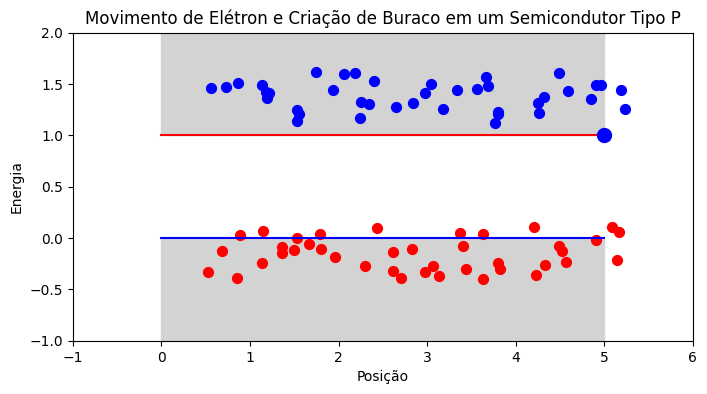

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Configurações iniciais
fig, ax = plt.subplots(figsize=(8, 4))

# Definir os limites do gráfico
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 2)

# Títulos e labels
ax.set_title('Movimento de Elétron e Criação de Buraco em um Semicondutor Tipo P')
ax.set_xlabel('Posição')
ax.set_ylabel('Energia')

# Desenhar a banda de valência e condução com fundo cinza
ax.fill_between([0, 5], 0, -1, color='lightgray')
ax.fill_between([0, 5], 2, 1, color='lightgray')

# Partículas no material sólido (representando os átomos)
num_particles = 40
valencia_particles_x = np.linspace(0.25, 4.75, num_particles)
valencia_particles_y = np.random.uniform(-0.5, 0, num_particles)
conducao_particles_x = np.linspace(0.25, 4.75, num_particles)
conducao_particles_y = np.random.uniform(1, 1.5, num_particles)

# Inicializar as amplitudes das vibrações
valencia_amplitude_x = np.random.uniform(0.05, 0.2, num_particles)
valencia_amplitude_y = np.random.uniform(0.02, 0.05, num_particles)
conducao_amplitude_x = np.random.uniform(0.05, 0.2, num_particles)
conducao_amplitude_y = np.random.uniform(0.02, 0.05, num_particles)

# Desenhar as partículas na banda de valência e condução
valencia_particles = ax.scatter(valencia_particles_x, valencia_particles_y, color='red', s=50)
conducao_particles = ax.scatter(conducao_particles_x, conducao_particles_y, color='blue', s=50)

# Desenhar as linhas das bandas
valencia_band = ax.plot([0, 5], [0, 0], color='blue', label='Banda de Valência')[0]
conducao_band = ax.plot([0, 5], [1, 1], color='red', label='Banda de Condução')[0]

# Inicializar a posição do elétron e do buraco
eletron, = ax.plot([], [], 'bo', markersize=10, label='Elétron')
buraco, = ax.plot([], [], 'ro', markersize=10, label='Buraco')

# Função de inicialização
def init():
    eletron.set_data([], [])
    buraco.set_data([], [])
    return eletron, buraco, valencia_particles, conducao_particles

# Função de animação
def animate(i):
    temperature_factor = 1 + i / 50  # Aumenta a temperatura mais rapidamente

    # Atualizar posições das partículas com vibração em torno da posição original
    valencia_new_x = valencia_particles_x + temperature_factor * valencia_amplitude_x * np.sin(2 * np.pi * i / 30)
    valencia_new_y = valencia_particles_y + temperature_factor * valencia_amplitude_y * np.sin(2 * np.pi * i / 30)

    conducao_new_x = conducao_particles_x + temperature_factor * conducao_amplitude_x * np.sin(2 * np.pi * i / 30)
    conducao_new_y = conducao_particles_y + temperature_factor * conducao_amplitude_y * np.sin(2 * np.pi * i / 30)

    valencia_particles.set_offsets(np.c_[valencia_new_x, valencia_new_y])
    conducao_particles.set_offsets(np.c_[conducao_new_x, conducao_new_y])

    if i < 30:  # Movimento do elétron na banda de valência
        x = i * 0.15 * temperature_factor
        y = 0
        eletron.set_data(x, y)
        buraco.set_data([], [])
    elif i < 60:  # Transição do elétron para a banda de condução
        x = 5
        y = (i - 30) * 0.05 * temperature_factor
        eletron.set_data(x, y)
        buraco.set_data([], [])
    else:  # Elétron na banda de condução, buraco na banda de valência
        x = 5
        y = 1
        eletron.set_data(x, y)
        buraco.set_data(5 - (i - 60) * 0.15 * temperature_factor, 0)

    return eletron, buraco, valencia_particles, conducao_particles

# Criar a animação
ani = animation.FuncAnimation(fig, animate, frames=100, init_func=init, blit=True, interval=100)

# Salvar o GIF
gif_path = "/content/drive/MyDrive/Trabalho 2 - Física Estatística/Simulações/eletron_semicondutor_vibracao_osc_harmonico_temp.gif"
ani.save(gif_path, writer='imagemagick')

gif_path
